<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### An√°lisis y Procesamiento de Se√±ales

# Trabajo Semanal N¬∫2
#### Lucas Douat

## Introduccion

En esta pr√°ctica se estudian sistemas lineales invariantes en el tiempo (LTI) mediante su representaci√≥n en diferencias. Se analiza la respuesta al impulso, la salida ante distintas se√±ales de entrada.

Se utiliza la funci√≥n `scipy.signal.lfilter` para aplicar la ecuaci√≥n en diferencias y un algoritmo que evalua condiciones que representa esta misma funci√≥n:

    $y[n] = 0.03x[n] + 0.05x[n-1] + 0.03x[n-2] + 1.5y[n-1] - 0.5y[n-2]$

Tambi√©n se trabajaron los sistemas:
- No Recursivos (Sin Realimentaci√≥n): $y[n] = x[n] + 3x[n-10]$
- Recursivos (Con Realimentaci√≥n) : $y[n] = x[n] + 3y[n-10]$

Se analiza la energ√≠a y potencia de las se√±ales de salida, y se intenta analizar la importancia de las muestras en este tipo de simulaci√≥n.

## Analisis y Desarrollo
Respuesta de mi sistema utilizando las se√±ales de la Tarea Semanal 1 y la funci√≥n `scipy.signal.lfilter`

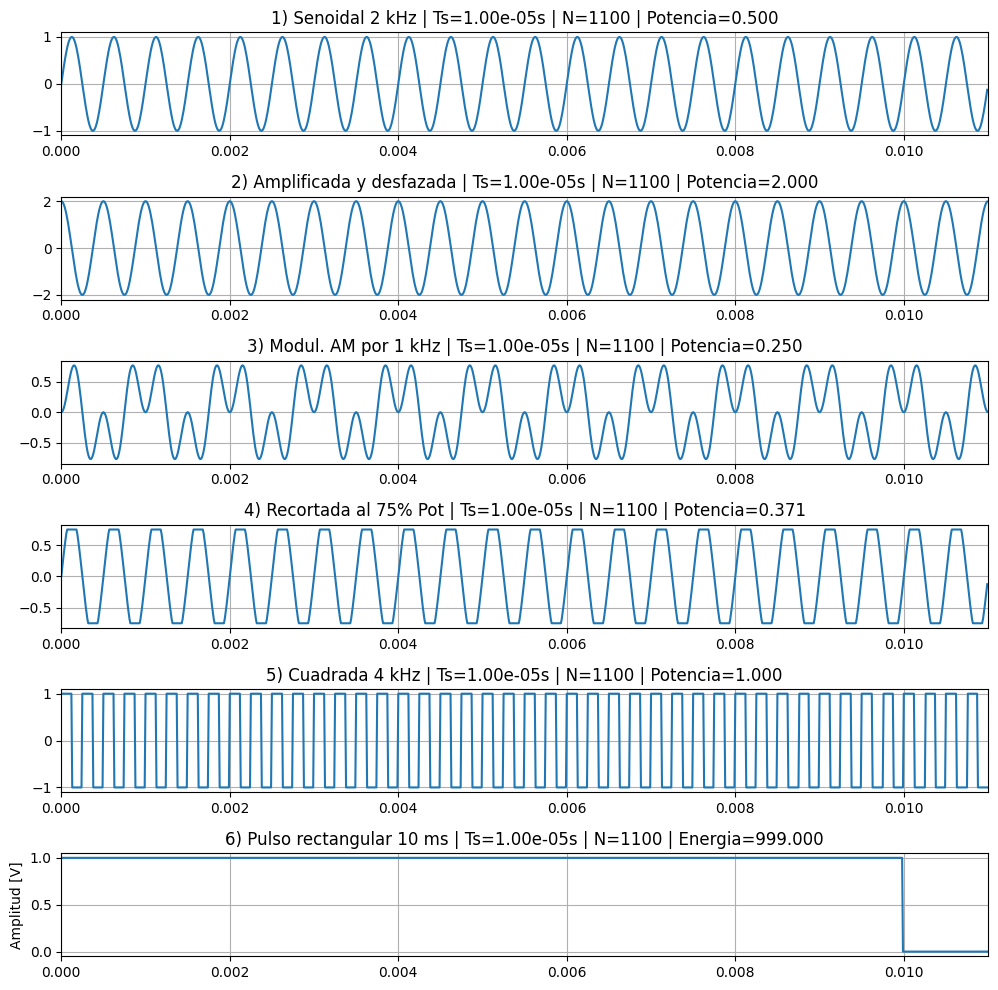

Producto interno entre x1 y x2: 0.00
Producto interno entre x1 y x3: -0.00
Producto interno entre x1 y x4: 470.58
Producto interno entre x1 y x5: -0.00
Producto interno entre x1 y x6: 0.13


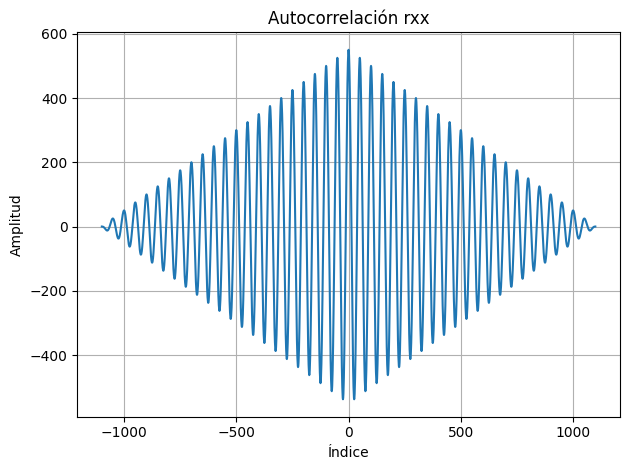

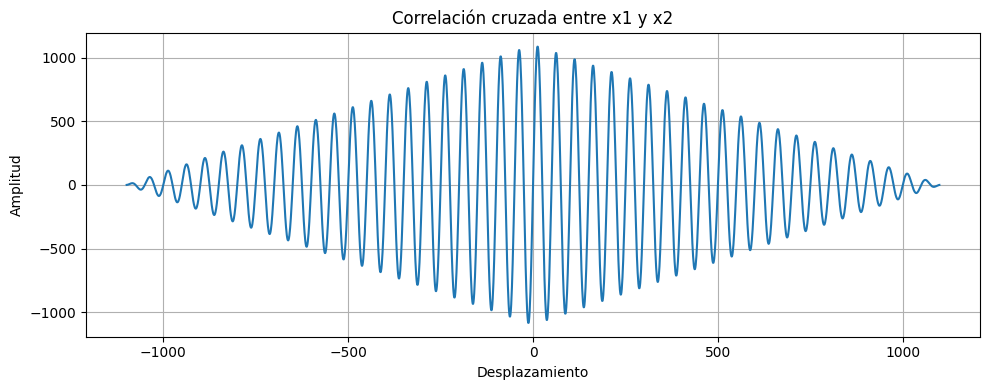

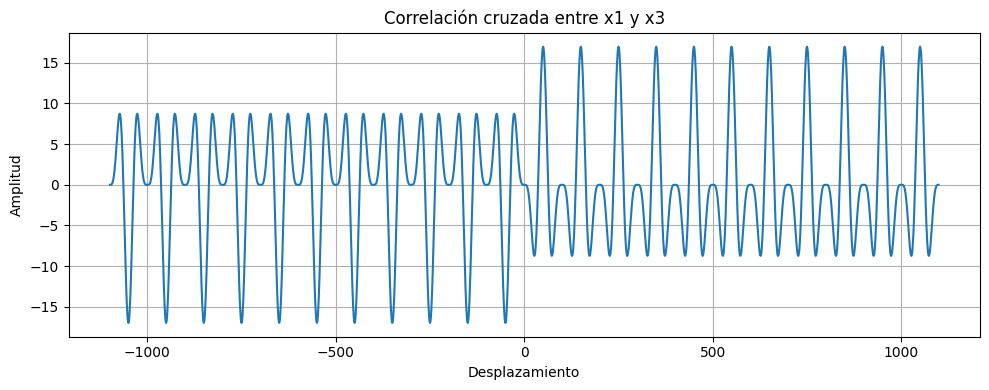

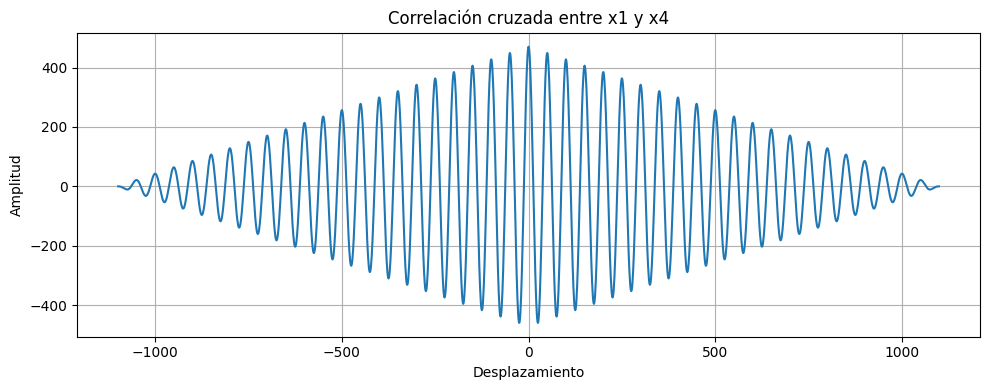

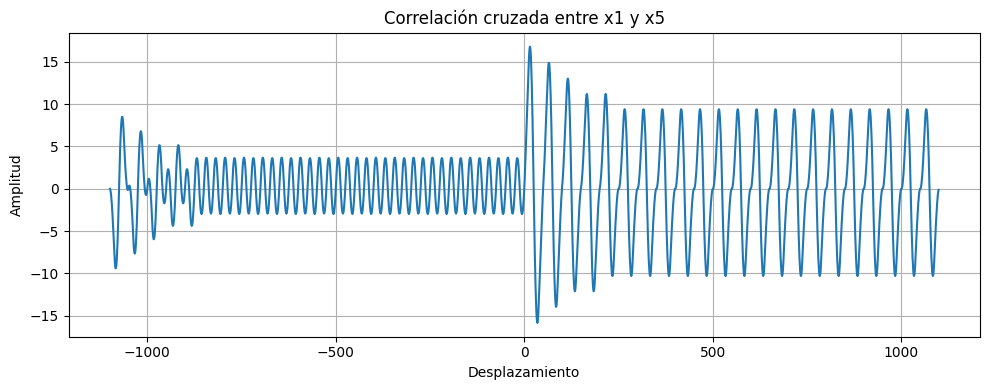

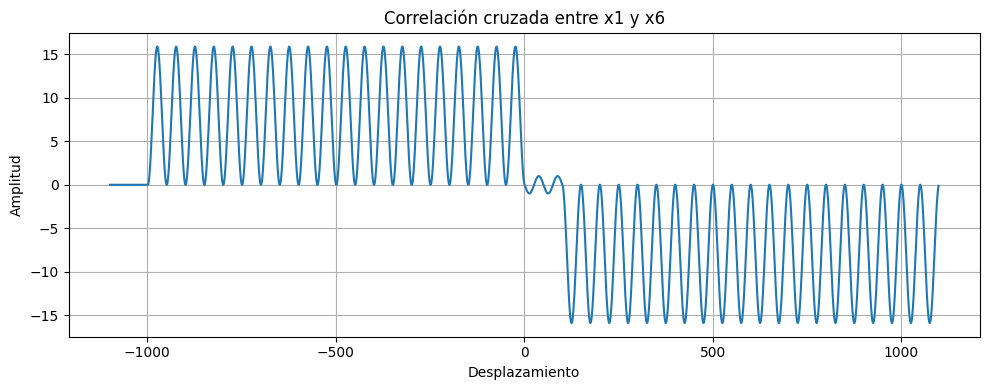

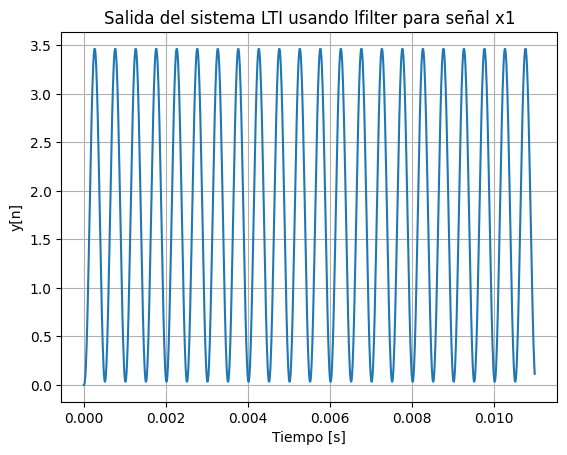

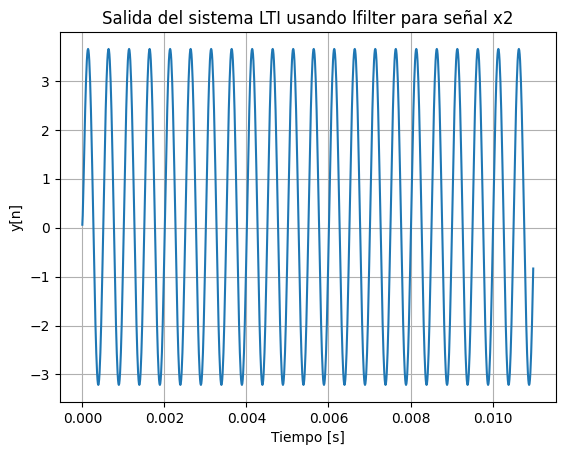

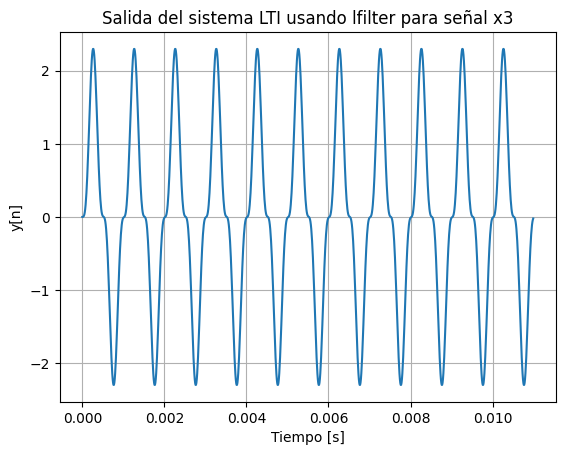

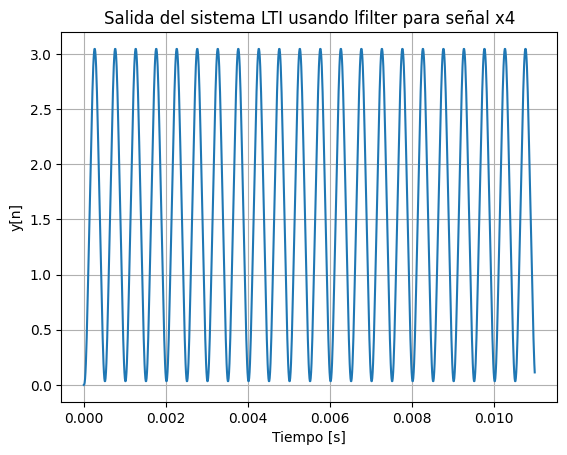

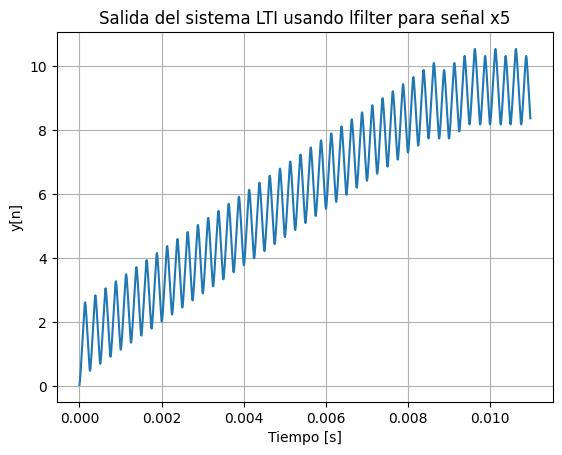

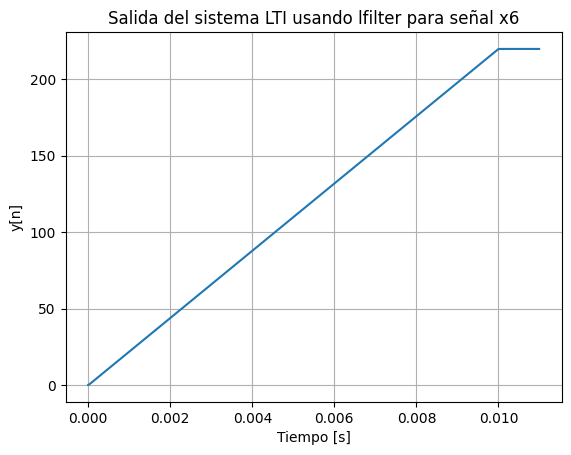

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 31 17:13:20 2025

@author: lucas-douat
"""

import numpy as np
import matplotlib.pyplot as plt
from ts1 import x1,x2,x3,x4,x5,x6
from scipy.signal import lfilter, square

#%%#%% 1) Ecuaci√≥n en diferencia que modela un sistema LTI:

# Par√°metros de simulaci√≥n
fs = 100000  # frecuencia de muestreo en Hz
ts = 1 / fs  # tiempo entre muestras
N =  1100    # n√∫mero de muestras
tt = np.linspace(0, (N-1)*ts,N).flatten()


# Coeficientes del sistema LTI
# y[n] = 0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2] + 1.5*y[n-1] - 0.5*y[n-2]
b = [0.03, 0.05, 0.03]  # coeficientes de entrada (numerador)
a = [1, -1.5, 0.5]      # coeficientes de salida (denominador)

#Aplicar lfilter a cada se√±al
se√±ales = [x1, x2, x3, x4, x5, x6]
nombres = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

for i, x in enumerate(se√±ales):
    y = lfilter(b, a, x)
    plt.figure()
    plt.plot(tt, y)
    plt.title(f"Salida del sistema LTI usando lfilter para se√±al {nombres[i]}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("y[n]")
    plt.grid(True)
    plt.show()

Implementaci√≥n de un **Algoritmo** para representar mi sistema LTI

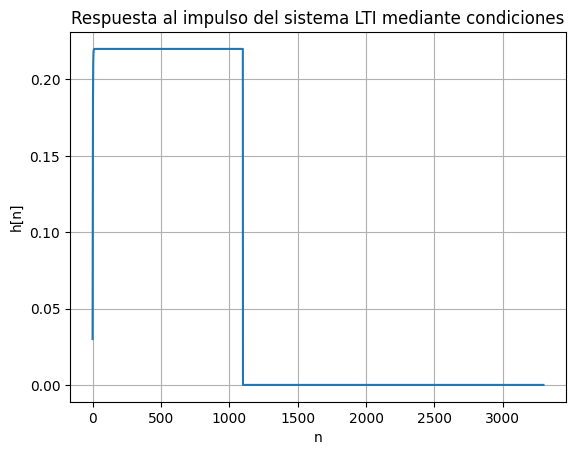

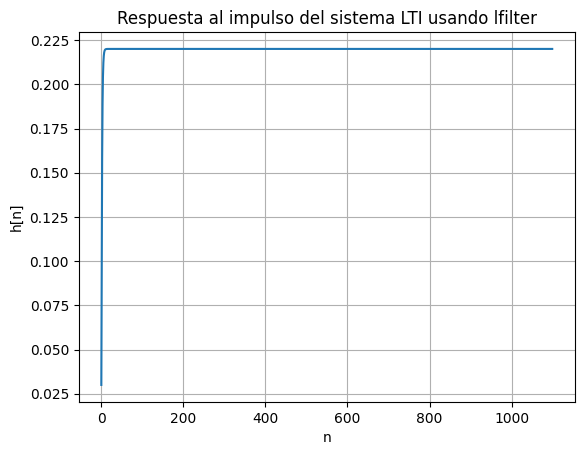

In [2]:
# Sistema LTI  usando condiciones
def sistema_lti(x):
    N = len(x)
    y = np.zeros(2*N+(N-1))
    #y = np.zeros(N)
    
    for n in range(N):
        #Condiciones para acceder a posiciones validas de las listas.
        x_n   = x[n] if n >= 0 else 0
        x_n1  = x[n-1] if n-1 >= 0 else 0
        x_n2  = x[n-2] if n-2 >= 0 else 0
        y_n1  = y[n-1] if n-1 >= 0 else 0
        y_n2  = y[n-2] if n-2 >= 0 else 0
        
        y[n] = 0.03*x_n + 0.05*x_n1 + 0.03*x_n2 + 1.5*y_n1 - 0.5*y_n2
    
    return y

# Impulso Unitaroio
impulso = np.zeros(N)
impulso[0] = 1  # impulso unitario

h1 = sistema_lti(impulso)
tt2 = np.linspace(0, (2*N+(N-1))*ts,2*N+(N-1)).flatten()

# Graficar
plt.plot(range(len(h1)),h1)
plt.title("Respuesta al impulso del sistema LTI mediante condiciones")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

h2 = lfilter(b,a,impulso)

# Graficar
plt.plot(range(len(h2)),h2)
plt.title("Respuesta al impulso del sistema LTI usando lfilter")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

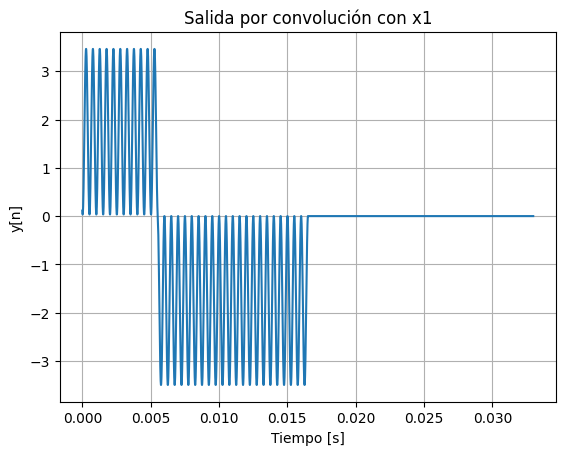

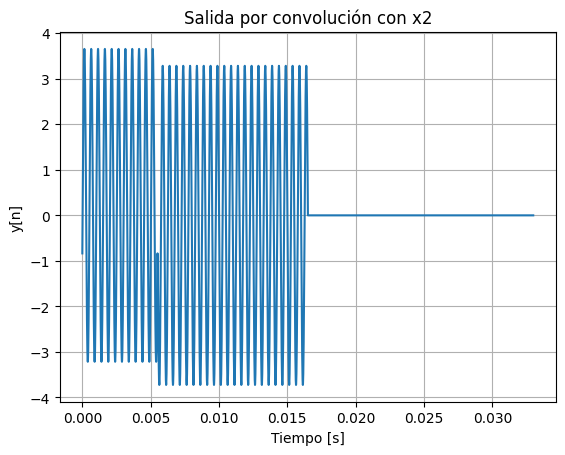

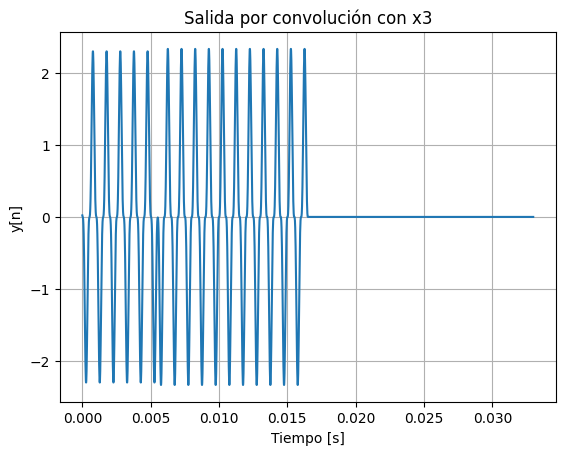

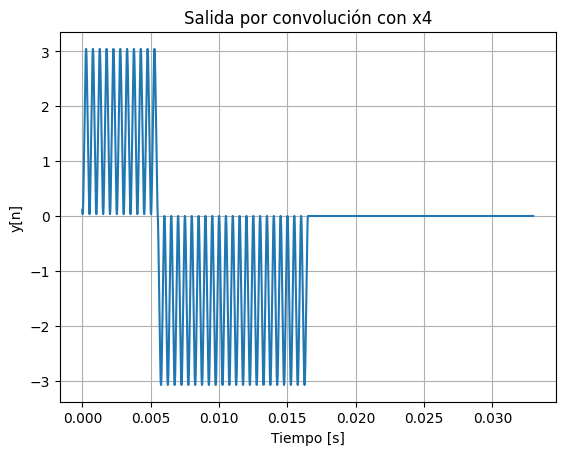

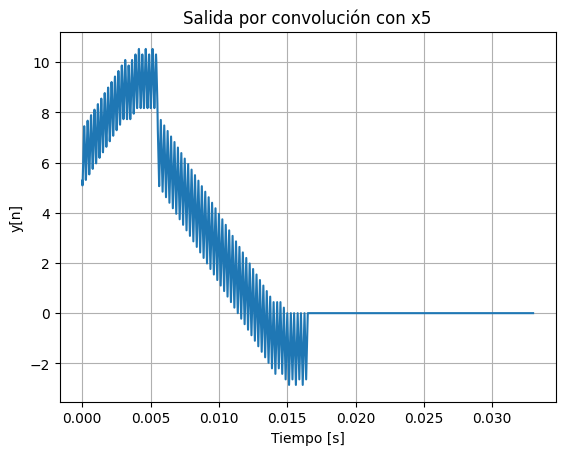

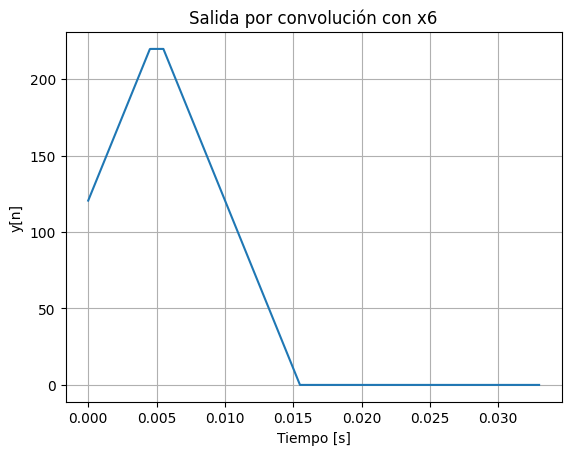

In [3]:
#%% Convoluci√≥n con se√±ales
se√±ales = [x1, x2, x3, x4, x5, x6]
labels = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

for i, x in enumerate(se√±ales):
    y_conv = np.convolve(x, h1, mode='same')
    plt.figure()
    plt.plot(tt2,y_conv)
    plt.title(f"Salida por convoluci√≥n con {labels[i]}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("y[n]")
    plt.grid(True)
    plt.show()

## üß† Importancia de la Cantidad de Muestras en Simulaci√≥n de Sistemas LTI

La cantidad de muestras `N` influye directamente en la calidad de la simulaci√≥n:

- **Resoluci√≥n temporal**: Un `N` mayor permite observar mejor la evoluci√≥n de se√±ales y respuestas prolongadas.
- **Resoluci√≥n espectral**: Aumentar `N` mejora la precisi√≥n en frecuencia, ya que Œîf = fs / N.
- **Evitar truncamiento**: En sistemas recursivos o al aplicar convoluci√≥n, un `N` peque√±o puede cortar la respuesta antes de que se desarrolle completamente.

üîÅ **Recomendaci√≥n**: Usar `N ‚â• 10000` junto con **zero-padding** asegura que la respuesta al impulso y la salida del sistema se representen correctamente, sin p√©rdida de informaci√≥n.



## ‚úÖ Conclusiones

Durante el trabajo implement√© un sistema LTI definido por una ecuaci√≥n en diferencias y lo apliqu√© a distintas se√±ales de entrada. Esto permiti√≥ observar c√≥mo var√≠a la salida seg√∫n la forma, frecuencia y duraci√≥n de cada se√±al.

La comparaci√≥n entre la **respuesta al impulso obtenida con `lfilter`** y la **implementaci√≥n manual** mostr√≥ diferencias importantes:

- La versi√≥n manual mantiene la respuesta constante durante m√°s muestras, lo que puede reflejar una mejor preservaci√≥n de la din√°mica del sistema.
- `lfilter` estabiliza r√°pidamente la salida, lo que puede deberse a c√≥mo gestiona internamente las condiciones iniciales y la cantidad de muestras disponibles.

Esto sugiere que `lfilter` puede **truncar la respuesta** si no se aplica correctamente el **zero-padding**, lo que afecta la fidelidad de la simulaci√≥n. Por eso, se recomienda extender las se√±ales para asegurar que la respuesta completa se desarrolle.

En s√≠ntesis, el trabajo permiti√≥ consolidar conceptos como:
- Modelado de sistemas LTI
- Respuesta al impulso
- Convoluci√≥n
- Potencia y energ√≠a
- Zero-padding
- Comparaci√≥n entre m√©todos de simulaci√≥n

## üß† Autoevaluaci√≥n del aprendizaje

Durante el desarrollo de este trabajo logr√© afianzar conceptos clave sobre sistemas LTI y su implementaci√≥n en entornos digitales:

- Comprend√≠ c√≥mo aplicar ecuaciones en diferencias para modelar sistemas LTI, tanto con `scipy.signal.lfilter` como mediante una funci√≥n propia que considera condiciones iniciales.
- Aprend√≠ a calcular y graficar la **respuesta al impulso**, entendiendo su rol fundamental en la caracterizaci√≥n de sistemas.
- Reforc√© la diferencia entre **energ√≠a** y **potencia**, y su aplicaci√≥n seg√∫n el tipo de se√±al.
- Experiment√© con se√±ales reales (senoidal, cuadrada, modulada, pulso) y observ√© c√≥mo se comportan al pasar por sistemas LTI.
- Incorpor√© el uso de **zero-padding** para evitar truncamiento y mejorar la resoluci√≥n temporal y espectral.

Adem√°s, este trabajo me permiti√≥ mejorar el manejo de herramientas como **Spyder** y **Jupyter Notebook**, aprendiendo a depurar c√≥digo, interpretar errores como el desajuste de dimensiones en `matplotlib`, y validar resultados mediante gr√°ficos.

Utilic√© Copilot como apoyo para:
- Consultar conceptos te√≥ricos sobre sistemas LTI, convoluci√≥n y respuesta al impulso.
- Interpretar diferencias entre m√©todos de simulaci√≥n (`lfilter` vs implementaci√≥n manual).
- Resolver dudas sobre c√≥mo aplicar padding correctamente y ajustar vectores de tiempo.
- Validar f√≥rmulas matem√°ticas y estructuras de c√≥digo en Python.
